In [1]:
import config
import ast

import pandas as pd
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import statistics

from utils.pandas_dataframe import grid_display
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from itertools import permutations
import gc

# validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from morfist import MixedRandomForest

# grid search
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.model_selection import GridSearchCV


from sklearn.multioutput import RegressorChain
from sklearn.multioutput import MultiOutputRegressor

from IPython.display import display


%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format',lambda x: '%.2f' % x)
# pd.set_option('display.max_rows', 5)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_excel('../Data/2022-train-v2.xlsx')

In [4]:
data_y = data[['sensor_point5_i_value', 'sensor_point6_i_value',\
               'sensor_point7_i_value', 'sensor_point8_i_value',\
               'sensor_point9_i_value', 'sensor_point10_i_value']]
data_x = data.drop(['sensor_point5_i_value', 'sensor_point6_i_value',\
                    'sensor_point7_i_value', 'sensor_point8_i_value',\
                    'sensor_point9_i_value', 'sensor_point10_i_value'], axis=1)

In [5]:
data_x = data_x.fillna(0)

In [6]:
# X變數標準化
scaler = StandardScaler().fit(data_x)
data_x_S = scaler.transform(data_x)

In [7]:
config.grid_search_Cat.fit(data_x_S, data_y.loc[:,config.Y_variable])
config.grid_search_Cat.best_params_

0:	learn: 12.5984250	total: 152ms	remaining: 15s
1:	learn: 12.1649407	total: 161ms	remaining: 7.89s
2:	learn: 11.7265990	total: 171ms	remaining: 5.54s
3:	learn: 11.3207854	total: 181ms	remaining: 4.33s
4:	learn: 10.9775313	total: 190ms	remaining: 3.61s
5:	learn: 10.6895099	total: 199ms	remaining: 3.11s
6:	learn: 10.3931949	total: 209ms	remaining: 2.77s
7:	learn: 10.1771006	total: 218ms	remaining: 2.51s
8:	learn: 9.9422258	total: 227ms	remaining: 2.3s
9:	learn: 9.7207445	total: 238ms	remaining: 2.14s
10:	learn: 9.5328084	total: 247ms	remaining: 2s
11:	learn: 9.3931440	total: 258ms	remaining: 1.89s
12:	learn: 9.2375288	total: 267ms	remaining: 1.78s
13:	learn: 9.0954968	total: 275ms	remaining: 1.69s
14:	learn: 8.9543769	total: 285ms	remaining: 1.61s
15:	learn: 8.7950992	total: 294ms	remaining: 1.54s
16:	learn: 8.7000120	total: 302ms	remaining: 1.48s
17:	learn: 8.5994854	total: 311ms	remaining: 1.42s
18:	learn: 8.5175670	total: 320ms	remaining: 1.36s
19:	learn: 8.4570399	total: 329ms	remai

{'depth': 5,
 'eval_metric': 'RMSE',
 'iterations': 100,
 'l2_leaf_reg': 0.5,
 'learning_rate': 0.1,
 'random_state': 1}

In [8]:
model_select = Pipeline([('poly',PolynomialFeatures(degree = 2)),
                         ('std_scaler', StandardScaler()),
                         ('mod', config.model_info['Cat']['Model'])  # 修改model
                        ])

model_select.fit(data_x, data_y.loc[:,config.Y_variable])

y_predict = model_select.predict(data_x)
y_predict

0:	learn: 12.7631968	total: 173ms	remaining: 34.4s
1:	learn: 12.4223571	total: 309ms	remaining: 30.5s
2:	learn: 12.0414633	total: 403ms	remaining: 26.5s
3:	learn: 11.7217643	total: 520ms	remaining: 25.5s
4:	learn: 11.4082068	total: 648ms	remaining: 25.3s
5:	learn: 11.1397906	total: 759ms	remaining: 24.5s
6:	learn: 10.9503336	total: 860ms	remaining: 23.7s
7:	learn: 10.7633070	total: 962ms	remaining: 23.1s
8:	learn: 10.5836017	total: 1.06s	remaining: 22.5s
9:	learn: 10.3860059	total: 1.18s	remaining: 22.4s
10:	learn: 10.2310850	total: 1.3s	remaining: 22.3s
11:	learn: 10.1061482	total: 1.42s	remaining: 22.2s
12:	learn: 9.9963212	total: 1.51s	remaining: 21.8s
13:	learn: 9.8550978	total: 1.61s	remaining: 21.4s
14:	learn: 9.7705832	total: 1.72s	remaining: 21.2s
15:	learn: 9.6741743	total: 1.83s	remaining: 21.1s
16:	learn: 9.5824376	total: 1.94s	remaining: 20.9s
17:	learn: 9.4778075	total: 2.06s	remaining: 20.9s
18:	learn: 9.3711661	total: 2.17s	remaining: 20.7s
19:	learn: 9.2657136	total: 2.

161:	learn: 6.5670724	total: 15.8s	remaining: 3.7s
162:	learn: 6.5616887	total: 15.9s	remaining: 3.6s
163:	learn: 6.5576944	total: 16s	remaining: 3.5s
164:	learn: 6.5506457	total: 16.1s	remaining: 3.41s
165:	learn: 6.5443569	total: 16.1s	remaining: 3.31s
166:	learn: 6.5325835	total: 16.2s	remaining: 3.21s
167:	learn: 6.5261623	total: 16.3s	remaining: 3.11s
168:	learn: 6.5215527	total: 16.4s	remaining: 3.01s
169:	learn: 6.5167750	total: 16.5s	remaining: 2.91s
170:	learn: 6.5086921	total: 16.6s	remaining: 2.81s
171:	learn: 6.5037531	total: 16.7s	remaining: 2.71s
172:	learn: 6.4984040	total: 16.7s	remaining: 2.61s
173:	learn: 6.4920302	total: 16.8s	remaining: 2.51s
174:	learn: 6.4855213	total: 16.9s	remaining: 2.42s
175:	learn: 6.4826403	total: 17s	remaining: 2.32s
176:	learn: 6.4755839	total: 17.1s	remaining: 2.22s
177:	learn: 6.4587815	total: 17.2s	remaining: 2.13s
178:	learn: 6.4521321	total: 17.3s	remaining: 2.03s
179:	learn: 6.4429236	total: 17.4s	remaining: 1.94s
180:	learn: 6.43981

array([ 40.45266456,  40.66280214,  40.66280214,  40.66280214,
        45.55883964,  45.55883964,  45.55883964,  45.55883964,
        46.96316571,  46.96316571,  48.3272795 ,  48.3272795 ,
        48.3272795 ,  48.3272795 ,  61.54862845,  61.54862845,
        60.085194  ,  60.085194  ,  59.14888167,  60.4988775 ,
        60.4988775 ,  60.4988775 ,  55.75251825,  55.75251825,
        55.75251825,  55.48108488,  58.91971342,  77.52194571,
        77.52194571,  79.15419709,  79.15419709,  79.15419709,
        79.15419709,  80.42794796,  78.40386013,  78.40386013,
        78.40386013,  78.40386013,  78.40386013,  78.40386013,
        78.40386013,  78.40386013,  69.77025799,  69.77025799,
        69.77025799,  66.94577798,  66.94577798,  66.94577798,
        68.55630153,  63.63044121,  63.07228891,  63.07228891,
        63.07228891,  62.29402441,  62.29402441,  70.76206972,
        70.76206972,  70.76206972,  70.76206972,  70.76206972,
        84.76754982,  84.76754982,  85.87499166,  86.03

In [9]:
k_fold_RMSE = -cross_val_score(model_select, 
                               data_x,
                               data_y.loc[:,config.Y_variable], 
                               cv = 5, 
                               scoring = 'neg_root_mean_squared_error').mean()

print('RMSE:' + str(round(k_fold_RMSE,2)))

0:	learn: 11.9529955	total: 151ms	remaining: 30.1s
1:	learn: 11.6243204	total: 272ms	remaining: 26.9s
2:	learn: 11.3175429	total: 373ms	remaining: 24.5s
3:	learn: 10.9846382	total: 475ms	remaining: 23.3s
4:	learn: 10.7133706	total: 562ms	remaining: 21.9s
5:	learn: 10.5031611	total: 654ms	remaining: 21.1s
6:	learn: 10.3253557	total: 733ms	remaining: 20.2s
7:	learn: 10.1737999	total: 825ms	remaining: 19.8s
8:	learn: 10.0328763	total: 922ms	remaining: 19.6s
9:	learn: 9.8876218	total: 1.01s	remaining: 19.1s
10:	learn: 9.7776634	total: 1.1s	remaining: 18.9s
11:	learn: 9.6555146	total: 1.18s	remaining: 18.6s
12:	learn: 9.5666614	total: 1.28s	remaining: 18.4s
13:	learn: 9.4099411	total: 1.37s	remaining: 18.2s
14:	learn: 9.3011776	total: 1.46s	remaining: 18s
15:	learn: 9.1791823	total: 1.55s	remaining: 17.9s
16:	learn: 9.1128590	total: 1.65s	remaining: 17.8s
17:	learn: 9.0506800	total: 1.75s	remaining: 17.7s
18:	learn: 8.9903254	total: 1.84s	remaining: 17.5s
19:	learn: 8.9473749	total: 1.94s	r

161:	learn: 6.2740740	total: 14.7s	remaining: 3.45s
162:	learn: 6.2676161	total: 14.8s	remaining: 3.35s
163:	learn: 6.2622975	total: 14.9s	remaining: 3.26s
164:	learn: 6.2536640	total: 14.9s	remaining: 3.17s
165:	learn: 6.2473859	total: 15s	remaining: 3.08s
166:	learn: 6.2427816	total: 15.1s	remaining: 2.98s
167:	learn: 6.2369911	total: 15.2s	remaining: 2.89s
168:	learn: 6.2310250	total: 15.3s	remaining: 2.8s
169:	learn: 6.2256548	total: 15.4s	remaining: 2.71s
170:	learn: 6.2212642	total: 15.4s	remaining: 2.62s
171:	learn: 6.2159507	total: 15.5s	remaining: 2.53s
172:	learn: 6.2085335	total: 15.6s	remaining: 2.44s
173:	learn: 6.2039128	total: 15.7s	remaining: 2.35s
174:	learn: 6.1995391	total: 15.8s	remaining: 2.26s
175:	learn: 6.1953056	total: 15.9s	remaining: 2.17s
176:	learn: 6.1906648	total: 16s	remaining: 2.07s
177:	learn: 6.1864567	total: 16s	remaining: 1.98s
178:	learn: 6.1835699	total: 16.1s	remaining: 1.89s
179:	learn: 6.1796227	total: 16.2s	remaining: 1.8s
180:	learn: 6.172676

123:	learn: 6.0630182	total: 11.5s	remaining: 7.03s
124:	learn: 6.0544808	total: 11.5s	remaining: 6.92s
125:	learn: 6.0442429	total: 11.6s	remaining: 6.81s
126:	learn: 6.0257961	total: 11.7s	remaining: 6.71s
127:	learn: 6.0191922	total: 11.7s	remaining: 6.6s
128:	learn: 6.0113811	total: 11.8s	remaining: 6.5s
129:	learn: 6.0013437	total: 11.9s	remaining: 6.4s
130:	learn: 5.9921536	total: 12s	remaining: 6.3s
131:	learn: 5.9852390	total: 12s	remaining: 6.2s
132:	learn: 5.9788886	total: 12.1s	remaining: 6.1s
133:	learn: 5.9711832	total: 12.2s	remaining: 6s
134:	learn: 5.9638850	total: 12.3s	remaining: 5.91s
135:	learn: 5.9476082	total: 12.3s	remaining: 5.81s
136:	learn: 5.9349701	total: 12.4s	remaining: 5.71s
137:	learn: 5.9232437	total: 12.5s	remaining: 5.62s
138:	learn: 5.9173680	total: 12.6s	remaining: 5.52s
139:	learn: 5.8911953	total: 12.7s	remaining: 5.42s
140:	learn: 5.8843171	total: 12.7s	remaining: 5.33s
141:	learn: 5.8776210	total: 12.8s	remaining: 5.23s
142:	learn: 5.8706260	tot

86:	learn: 7.3710215	total: 8.04s	remaining: 10.4s
87:	learn: 7.3494302	total: 8.13s	remaining: 10.4s
88:	learn: 7.3292161	total: 8.21s	remaining: 10.2s
89:	learn: 7.2972305	total: 8.3s	remaining: 10.1s
90:	learn: 7.2772865	total: 8.39s	remaining: 10.1s
91:	learn: 7.2596233	total: 8.47s	remaining: 9.95s
92:	learn: 7.2434685	total: 8.57s	remaining: 9.86s
93:	learn: 7.2245573	total: 8.67s	remaining: 9.77s
94:	learn: 7.2037419	total: 8.75s	remaining: 9.67s
95:	learn: 7.1899201	total: 8.83s	remaining: 9.57s
96:	learn: 7.1740492	total: 8.92s	remaining: 9.48s
97:	learn: 7.1592924	total: 9s	remaining: 9.37s
98:	learn: 7.1421961	total: 9.09s	remaining: 9.28s
99:	learn: 7.1152222	total: 9.18s	remaining: 9.18s
100:	learn: 7.1043172	total: 9.26s	remaining: 9.08s
101:	learn: 7.0920364	total: 9.36s	remaining: 8.99s
102:	learn: 7.0809193	total: 9.44s	remaining: 8.89s
103:	learn: 7.0725325	total: 9.53s	remaining: 8.8s
104:	learn: 7.0584318	total: 9.62s	remaining: 8.7s
105:	learn: 7.0439872	total: 9.7

48:	learn: 8.0214183	total: 3.82s	remaining: 11.8s
49:	learn: 7.9926900	total: 3.91s	remaining: 11.7s
50:	learn: 7.9773699	total: 3.98s	remaining: 11.6s
51:	learn: 7.9586624	total: 4.06s	remaining: 11.5s
52:	learn: 7.9399046	total: 4.13s	remaining: 11.4s
53:	learn: 7.9170361	total: 4.2s	remaining: 11.3s
54:	learn: 7.9006794	total: 4.27s	remaining: 11.3s
55:	learn: 7.8857352	total: 4.35s	remaining: 11.2s
56:	learn: 7.8683438	total: 4.43s	remaining: 11.1s
57:	learn: 7.8403247	total: 4.5s	remaining: 11s
58:	learn: 7.8006020	total: 4.58s	remaining: 10.9s
59:	learn: 7.7696311	total: 4.65s	remaining: 10.9s
60:	learn: 7.7495223	total: 4.74s	remaining: 10.8s
61:	learn: 7.7038398	total: 4.82s	remaining: 10.7s
62:	learn: 7.6830263	total: 4.89s	remaining: 10.6s
63:	learn: 7.6667512	total: 4.97s	remaining: 10.6s
64:	learn: 7.6374703	total: 5.05s	remaining: 10.5s
65:	learn: 7.6172451	total: 5.12s	remaining: 10.4s
66:	learn: 7.5933896	total: 5.2s	remaining: 10.3s
67:	learn: 7.5645833	total: 5.28s	re

10:	learn: 10.2031750	total: 887ms	remaining: 15.2s
11:	learn: 10.0459108	total: 961ms	remaining: 15s
12:	learn: 9.9203077	total: 1.04s	remaining: 15s
13:	learn: 9.8147093	total: 1.12s	remaining: 14.9s
14:	learn: 9.6902817	total: 1.22s	remaining: 15s
15:	learn: 9.6003908	total: 1.29s	remaining: 14.8s
16:	learn: 9.5405475	total: 1.36s	remaining: 14.7s
17:	learn: 9.4172130	total: 1.45s	remaining: 14.7s
18:	learn: 9.3305809	total: 1.54s	remaining: 14.6s
19:	learn: 9.2489156	total: 1.61s	remaining: 14.5s
20:	learn: 9.1581555	total: 1.69s	remaining: 14.4s
21:	learn: 9.0964125	total: 1.76s	remaining: 14.3s
22:	learn: 9.0489324	total: 1.83s	remaining: 14.1s
23:	learn: 8.9867527	total: 1.9s	remaining: 14s
24:	learn: 8.9422449	total: 1.99s	remaining: 13.9s
25:	learn: 8.8863225	total: 2.06s	remaining: 13.8s
26:	learn: 8.8058866	total: 2.14s	remaining: 13.7s
27:	learn: 8.7858717	total: 2.22s	remaining: 13.6s
28:	learn: 8.7053108	total: 2.3s	remaining: 13.6s
29:	learn: 8.6872964	total: 2.39s	remai

172:	learn: 6.4983172	total: 13.9s	remaining: 2.17s
173:	learn: 6.4841769	total: 14s	remaining: 2.09s
174:	learn: 6.4779917	total: 14.1s	remaining: 2.01s
175:	learn: 6.4735763	total: 14.2s	remaining: 1.93s
176:	learn: 6.4615154	total: 14.2s	remaining: 1.85s
177:	learn: 6.4577046	total: 14.3s	remaining: 1.77s
178:	learn: 6.4532890	total: 14.4s	remaining: 1.69s
179:	learn: 6.4411450	total: 14.5s	remaining: 1.61s
180:	learn: 6.4366268	total: 14.6s	remaining: 1.53s
181:	learn: 6.4203161	total: 14.7s	remaining: 1.45s
182:	learn: 6.4152606	total: 14.8s	remaining: 1.37s
183:	learn: 6.4121494	total: 14.8s	remaining: 1.29s
184:	learn: 6.4011489	total: 14.9s	remaining: 1.21s
185:	learn: 6.3958972	total: 15s	remaining: 1.13s
186:	learn: 6.3912027	total: 15.1s	remaining: 1.05s
187:	learn: 6.3877566	total: 15.2s	remaining: 970ms
188:	learn: 6.3825380	total: 15.3s	remaining: 889ms
189:	learn: 6.3808888	total: 15.4s	remaining: 809ms
190:	learn: 6.3752069	total: 15.5s	remaining: 729ms
191:	learn: 6.37

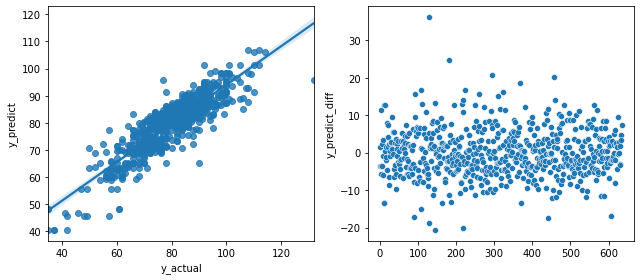

In [10]:
y_predict_diff = data_y.loc[:,config.Y_variable] - y_predict

model_result = pd.DataFrame({'y_predict_diff':y_predict_diff,
                             'y_actual':data_y.loc[:,config.Y_variable],
                             'y_predict':y_predict})
# display(Y_predict_diff)

# seaborn呈現結果
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# 預測值跟實際值分布狀況
sns.regplot(x = 'y_actual', 
            y = 'y_predict',
            data = model_result, 
            ax=axes[0])
    
    # 每筆資料的差異
sns.scatterplot(x = model_result.index,
                y = 'y_predict_diff',
                data = model_result, 
                ax=axes[1])
    
    
plt.tight_layout()